### UK TRAFFIC ACCIDENTS

****Steps****
1. Importing Libraries
2. Importing dataset
3. Checking for missing values
4. Handling missing values
5. Data transformation
6. Feature scaling
7. Splitting dataset into training and testing sets
8. Train the model
9. Evaluate the model


***Import neccessary Library***

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


***Read Dataset***

In [45]:
data=pd.read_csv('Uk_traffic_accidents.csv')
df_copy = data.copy()

In [46]:
df_copy.head()

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,Easting,Northing,...,Road2Class,Road2Number,PedCrossingHumanControl,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported
0,102262412010,2010,3,2,1,01/01/2010,6,13:10,382347,390025,...,3,5103,0,0,1,1,4,0,0,1
1,102262562010,2010,3,2,1,01/01/2010,6,11:10,381892,390582,...,7,0,0,0,1,1,4,0,0,1
2,102264322010,2010,3,2,1,01/01/2010,6,17:30,385840,403134,...,7,0,0,0,4,1,2,0,0,2
3,107264182010,2010,3,3,1,01/01/2010,6,13:49,377762,403302,...,1,60,0,0,3,9,1,0,0,2
4,114261842010,2010,3,1,1,01/01/2010,6,01:55,355982,404620,...,0,0,0,0,7,9,1,0,0,2


In [47]:
data.head()

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,Easting,Northing,...,Road2Class,Road2Number,PedCrossingHumanControl,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported
0,102262412010,2010,3,2,1,01/01/2010,6,13:10,382347,390025,...,3,5103,0,0,1,1,4,0,0,1
1,102262562010,2010,3,2,1,01/01/2010,6,11:10,381892,390582,...,7,0,0,0,1,1,4,0,0,1
2,102264322010,2010,3,2,1,01/01/2010,6,17:30,385840,403134,...,7,0,0,0,4,1,2,0,0,2
3,107264182010,2010,3,3,1,01/01/2010,6,13:49,377762,403302,...,1,60,0,0,3,9,1,0,0,2
4,114261842010,2010,3,1,1,01/01/2010,6,01:55,355982,404620,...,0,0,0,0,7,9,1,0,0,2


In [48]:
data.tail()

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,Easting,Northing,...,Road2Class,Road2Number,PedCrossingHumanControl,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported
45621,107279172021,2021,2,2,1,31/12/2021,6,12:29,378453,402781,...,0,0,0,0,1,1,2,0,0,1
45622,107303102021,2021,3,2,1,31/12/2021,6,14:19,383233,400989,...,7,0,0,0,1,1,2,0,0,1
45623,109325272021,2021,3,1,2,31/12/2021,6,14:00,391881,388935,...,7,0,0,4,1,1,1,0,0,3
45624,110300022021,2021,2,1,2,31/12/2021,6,21:30,392079,399718,...,0,0,0,0,4,1,1,0,0,1
45625,112325282021,2021,2,1,1,31/12/2021,6,17:55,379078,395181,...,6,0,0,5,4,1,1,0,0,1


In [49]:
data.columns

Index(['Accident Index', 'Year', 'Severity', 'NumberVehicles',
       'NumberCasualties', 'OutputDate', 'Day', 'OutputTime', 'Easting',
       'Northing', 'LocalAuthority', 'Road1Class', 'Road1Number',
       'CarriagewayType', 'SpeedLimit', 'JunctionDetail', 'JunctionControl',
       'Road2Class', 'Road2Number', 'PedCrossingHumanControl',
       'PedCrossingPhysicalFacilities', 'LightingCondition',
       'WeatherCondition', 'RoadSurface', 'SpecialConditions',
       'CarriagewayHazard', 'PlaceReported'],
      dtype='object')

***Sanity check of data***

In [50]:
#shape of data
data.shape

(45626, 27)

In [51]:
#Informations about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45626 entries, 0 to 45625
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Accident Index                 45626 non-null  int64 
 1   Year                           45626 non-null  int64 
 2   Severity                       45626 non-null  int64 
 3   NumberVehicles                 45626 non-null  int64 
 4   NumberCasualties               45626 non-null  int64 
 5   OutputDate                     45626 non-null  object
 6   Day                            45626 non-null  int64 
 7   OutputTime                     45626 non-null  object
 8   Easting                        45626 non-null  int64 
 9   Northing                       45626 non-null  int64 
 10  LocalAuthority                 45626 non-null  int64 
 11  Road1Class                     45626 non-null  int64 
 12  Road1Number                    45626 non-null  int64 
 13  C

In [52]:
# Convert 'OutputDate' and 'OutputTime' into a single datetime column
data['Datetime'] = pd.to_datetime(data['OutputDate'] + ' ' + data['OutputTime'], errors='coerce')
data = data.drop(columns=['OutputDate','OutputTime'])

# Check if the datetime conversion worked
print(data['Datetime'].head())


0   2010-01-01 13:10:00
1   2010-01-01 11:10:00
2   2010-01-01 17:30:00
3   2010-01-01 13:49:00
4   2010-01-01 01:55:00
Name: Datetime, dtype: datetime64[ns]


In [53]:
#finding missing value
data.isnull().sum()

Accident Index                   0
Year                             0
Severity                         0
NumberVehicles                   0
NumberCasualties                 0
Day                              0
Easting                          0
Northing                         0
LocalAuthority                   0
Road1Class                       0
Road1Number                      0
CarriagewayType                  0
SpeedLimit                       0
JunctionDetail                   0
JunctionControl                  0
Road2Class                       0
Road2Number                      0
PedCrossingHumanControl          0
PedCrossingPhysicalFacilities    0
LightingCondition                0
WeatherCondition                 0
RoadSurface                      0
SpecialConditions                0
CarriagewayHazard                0
PlaceReported                    0
Datetime                         0
dtype: int64

In [54]:
#finding duplicates
data.duplicated().sum()

0

In [55]:
#identifiying garbage values(A garbage value in a dataset refers to invalid data that doesn't conform to expected formats, ranges, or types, often resulting from errors in data collection or processing.)
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("****"*10)

***Exploratory Data Analysis***

In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Accident Index,45626.0,1.060841e+11,4.489904e+09,1.000006e+11,1.023662e+11,1.047456e+11,1.097096e+11,1.149993e+11
Year,45626.0,2.014872e+03,3.487337e+00,2.010000e+03,2.012000e+03,2.014000e+03,2.018000e+03,2.021000e+03
Severity,45626.0,2.813725e+00,4.242988e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
NumberVehicles,45626.0,1.870797e+00,7.225427e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.900000e+01
NumberCasualties,45626.0,1.372353e+00,9.469557e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.700000e+01
Day,45626.0,4.109148e+00,1.924096e+00,1.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
Easting,45626.0,3.817601e+05,9.666165e+03,3.523590e+05,3.764345e+05,3.837435e+05,3.889178e+05,4.046730e+05
Northing,45626.0,4.005419e+05,7.191118e+03,3.818900e+05,3.954900e+05,4.001690e+05,4.058638e+05,4.188210e+05
LocalAuthority,45626.0,1.055676e+02,4.482890e+00,1.000000e+02,1.020000e+02,1.040000e+02,1.090000e+02,1.140000e+02
Road1Class,45626.0,4.830820e+00,1.520224e+00,1.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00


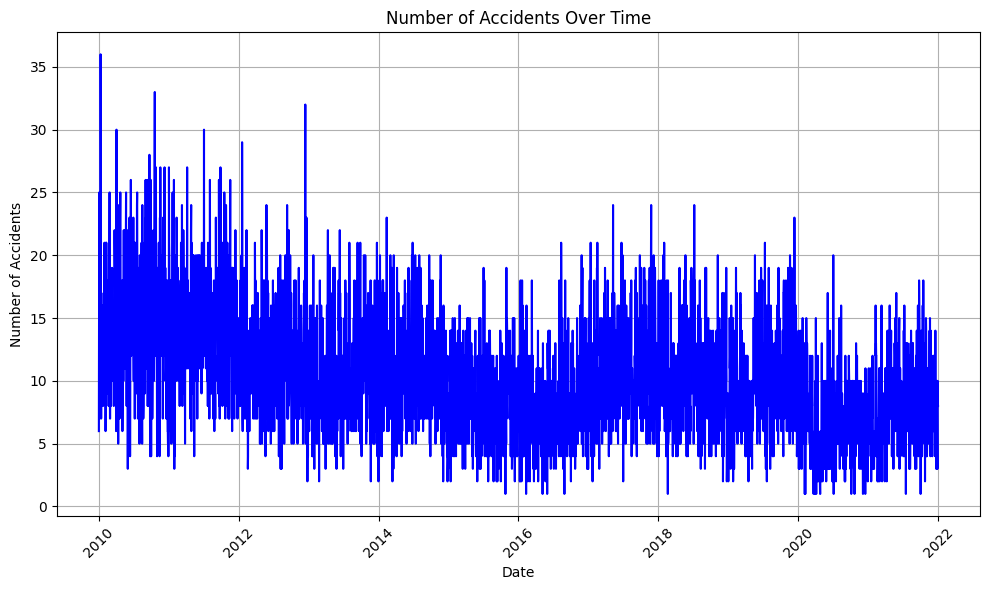

In [58]:
# Group by the datetime column and count the number of accidents per day
accidents_per_day = data.groupby(data['Datetime'].dt.date).size()

# Plotting the time series
plt.figure(figsize=(10, 6))
accidents_per_day.plot(kind='line', color='b')
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


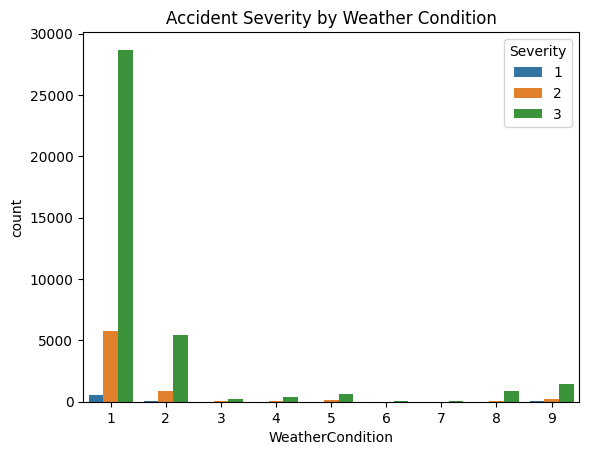

In [59]:
# Visualize how different weather conditions contribute to accident severity
sns.countplot(data=data, x='WeatherCondition', hue='Severity')
plt.title('Accident Severity by Weather Condition')
plt.show()


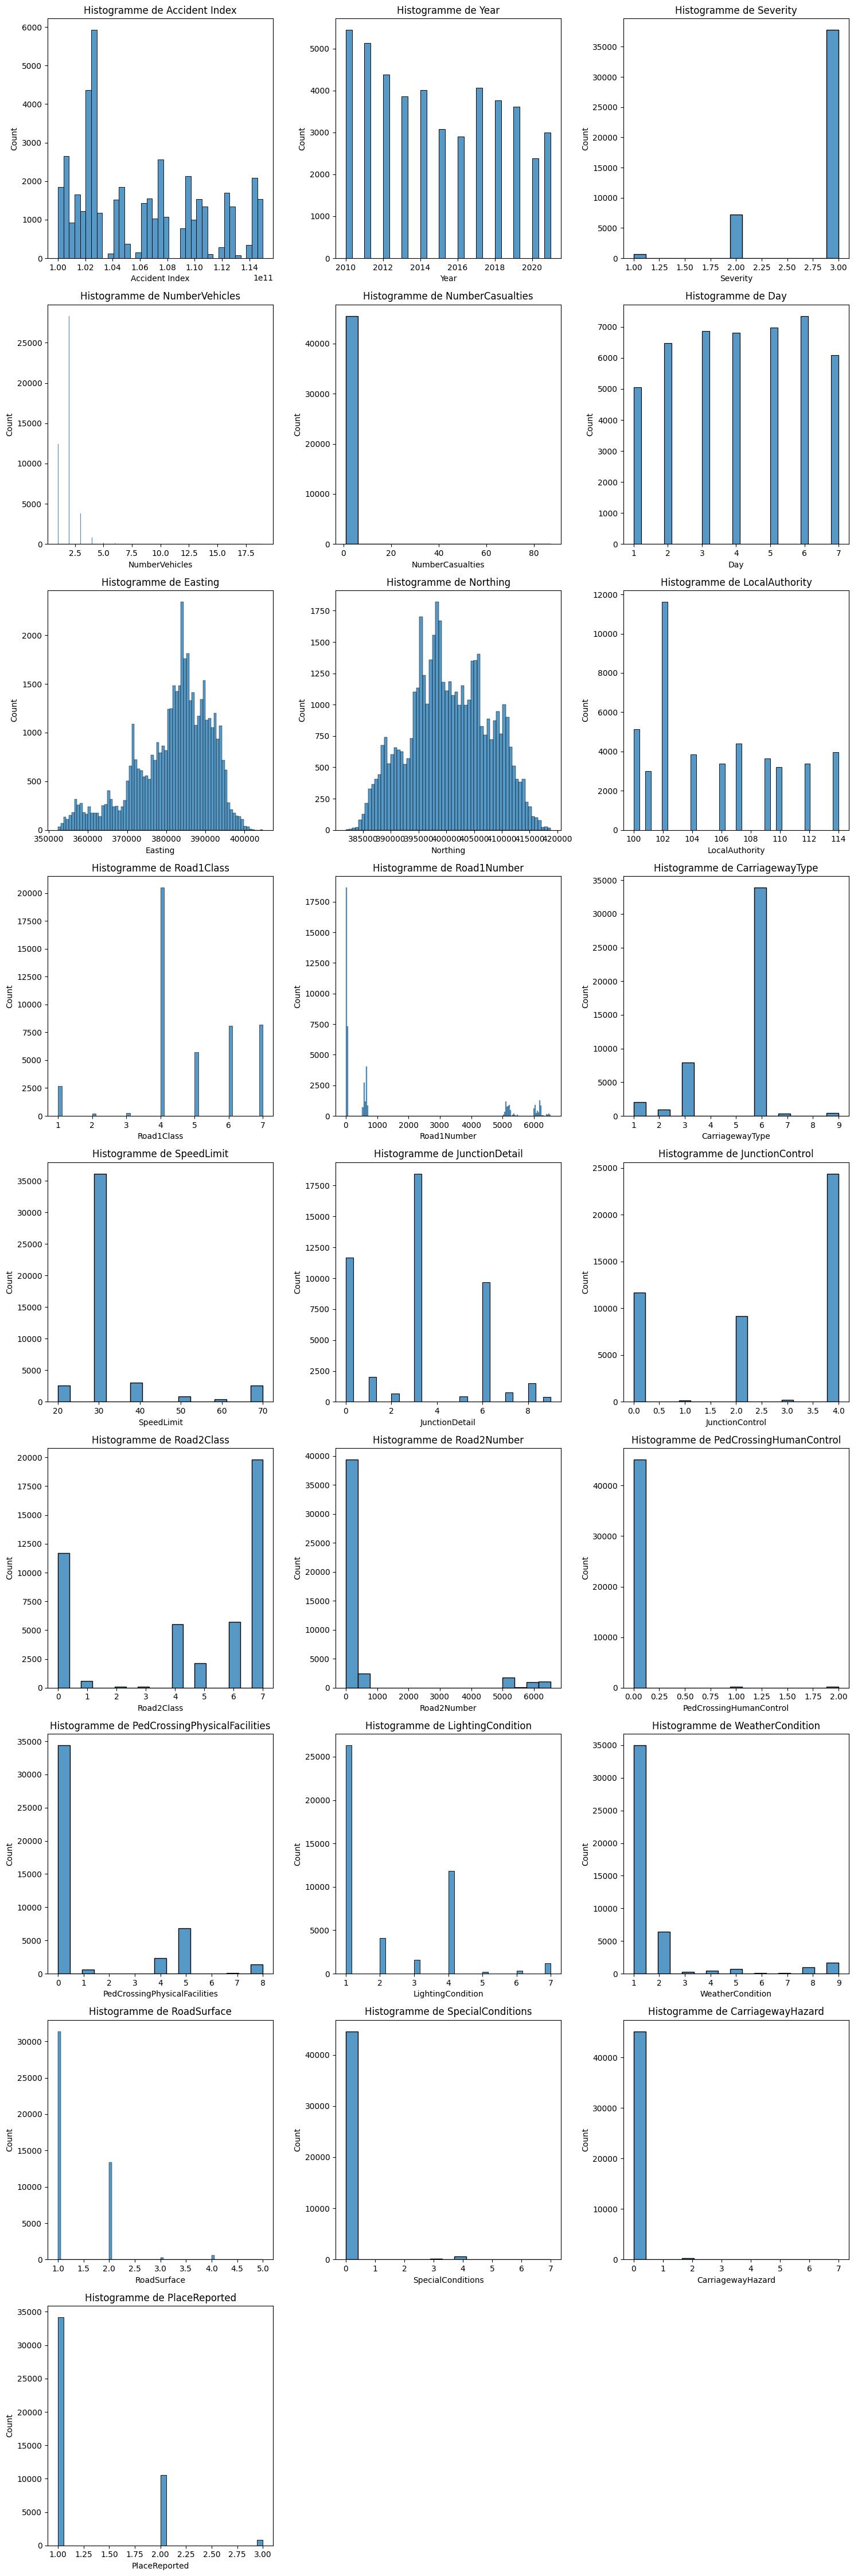

In [61]:
"""#histogram to understand the distribution

for i in data.select_dtypes(include="number").columns:
     sns.histplot(data=data,x=i)
     plt.show()"""
     


# Nombre de colonnes dans le graphique
num_cols = 3  # Choisissez le nombre de colonnes que vous voulez
num_rows = (len(data.select_dtypes(include="number").columns) + num_cols - 1) // num_cols  # Calculer le nombre de lignes

# Créer les sous-graphes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Aplatir la matrice d'axes pour l'itération
axes = axes.flatten()

# Parcourir les colonnes numériques et afficher les histogrammes
for i, col in enumerate(data.select_dtypes(include="number").columns):
    sns.histplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Histogramme de {col}')

# Supprimer les axes supplémentaires si nécessaire
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Ajuster l'espacement entre les graphiques
plt.show()

     
     

In [62]:
#correlation with heatmap to interpret the relation and multicolliniarity
corr_matrix = data.select_dtypes(include="number").corr()
corr_matrix

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,Day,Easting,Northing,LocalAuthority,Road1Class,...,Road2Class,Road2Number,PedCrossingHumanControl,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported
Accident Index,1.000000,-0.002211,-0.020785,0.017847,-0.003358,-0.002310,-0.186975,-0.295450,0.998592,-0.019276,...,-0.029831,-0.005422,-0.002672,-0.053197,-0.023506,-0.000866,0.000237,0.002741,-0.008724,-0.007705
Year,-0.002211,1.000000,-0.071620,0.014699,-0.029654,0.007068,0.002702,0.015018,-0.003955,0.008177,...,-0.062997,-0.001162,0.027159,0.056315,0.035149,-0.064164,-0.044709,-0.008526,0.002447,0.252985
Severity,-0.020785,-0.071620,1.000000,0.108019,0.002980,-0.005647,0.010743,-0.011926,-0.021074,-0.009272,...,0.046098,0.019212,0.008047,-0.001426,-0.037791,0.030460,0.012453,0.008785,-0.005505,0.117145
NumberVehicles,0.017847,0.014699,0.108019,1.000000,0.237209,-0.008207,-0.011373,-0.020869,0.017790,-0.201779,...,-0.012568,0.001037,-0.033596,-0.069212,-0.033680,-0.018709,0.003858,0.022028,-0.004374,-0.037721
NumberCasualties,-0.003358,-0.029654,0.002980,0.237209,1.000000,-0.012117,0.009643,0.021002,-0.003796,-0.101076,...,-0.036175,0.010349,-0.014923,-0.011543,0.028724,-0.013019,0.025783,0.029996,0.011551,-0.092055
Day,-0.002310,0.007068,-0.005647,-0.008207,-0.012117,1.000000,0.002287,0.000423,-0.002228,0.002552,...,0.001610,-0.003037,0.002770,0.009483,0.020387,0.001751,0.006937,0.001690,0.003144,0.001715
Easting,-0.186975,0.002702,0.010743,-0.011373,0.009643,0.002287,1.000000,-0.223636,-0.187173,0.035871,...,0.015956,0.016131,-0.008067,0.041921,0.009311,-0.009377,-0.009894,0.006050,-0.003566,0.000192
Northing,-0.295450,0.015018,-0.011926,-0.020869,0.021002,0.000423,-0.223636,1.000000,-0.296193,-0.020215,...,-0.010064,-0.029412,0.008112,-0.048494,0.005655,0.014911,0.027393,-0.004336,0.015148,-0.005953
LocalAuthority,0.998592,-0.003955,-0.021074,0.017790,-0.003796,-0.002228,-0.187173,-0.296193,1.000000,-0.018855,...,-0.029868,-0.005086,-0.003150,-0.053325,-0.023899,0.000090,-0.001188,0.003304,-0.008928,-0.005818
Road1Class,-0.019276,0.008177,-0.009272,-0.201779,-0.101076,0.002552,0.035871,-0.020215,-0.018855,1.000000,...,0.243253,-0.046778,0.001263,-0.127991,-0.028400,0.008919,-0.043187,-0.046868,-0.006388,0.078647


<Axes: >

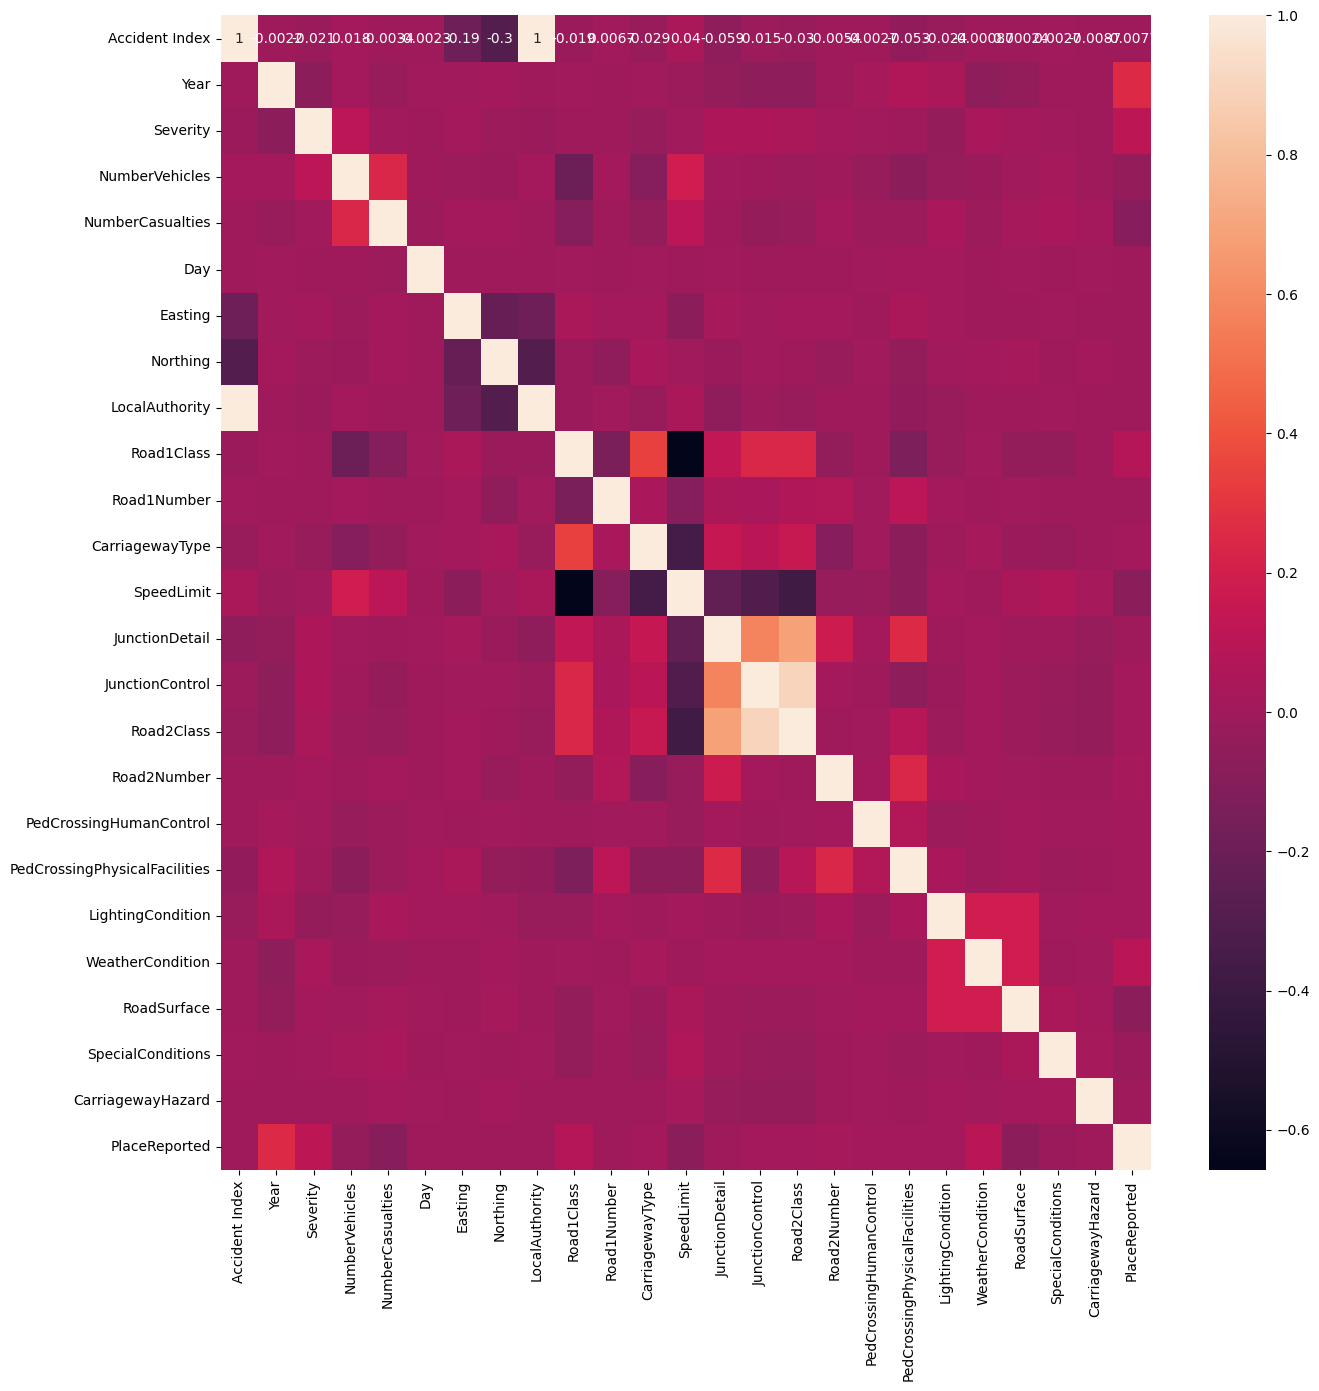

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)

### Handle multicollinearity

In [64]:
# Step 1: 
# (Set a threshold for relevance, e.g., |correlation| < 0.1)
weakly_correlated_features = corr_matrix['Severity'][corr_matrix['Severity'].abs() < 0.1].index
print("Features weakly correlated with 'Severity':", weakly_correlated_features)

# Drop weakly correlated features
#data = data.drop(columns=weakly_correlated_features)

# Step 2: Handle multicollinearity
# Find pairs of features with high correlation (e.g., |correlation| > 0.85)
high_correlation_pairs = []
threshold = 0.85
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row, col]) > threshold:
            high_correlation_pairs.append((row, col))

# Keep only one feature from highly correlated pairs
features_to_drop = set()
for pair in high_correlation_pairs:
    features_to_drop.add(pair[1])  # Arbitrarily drop the second feature in each pair

print("Features to drop due to high multicollinearity:", features_to_drop)

# Drop the redundant features
#data = data.drop(columns=list(features_to_drop))

# Step 3: Save the updated dataset
data.to_csv("updated_dataset.csv", index=False)
print("Updated dataset saved as 'updated_dataset.csv'.")


Features weakly correlated with 'Severity': Index(['Accident Index', 'Year', 'NumberCasualties', 'Day', 'Easting',
       'Northing', 'LocalAuthority', 'Road1Class', 'Road1Number',
       'CarriagewayType', 'SpeedLimit', 'JunctionDetail', 'JunctionControl',
       'Road2Class', 'Road2Number', 'PedCrossingHumanControl',
       'PedCrossingPhysicalFacilities', 'LightingCondition',
       'WeatherCondition', 'RoadSurface', 'SpecialConditions',
       'CarriagewayHazard'],
      dtype='object')
Features to drop due to high multicollinearity: {'Accident Index', 'Road2Class', 'LocalAuthority', 'JunctionControl'}
Updated dataset saved as 'updated_dataset.csv'.


In [65]:
data.columns


Index(['Accident Index', 'Year', 'Severity', 'NumberVehicles',
       'NumberCasualties', 'Day', 'Easting', 'Northing', 'LocalAuthority',
       'Road1Class', 'Road1Number', 'CarriagewayType', 'SpeedLimit',
       'JunctionDetail', 'JunctionControl', 'Road2Class', 'Road2Number',
       'PedCrossingHumanControl', 'PedCrossingPhysicalFacilities',
       'LightingCondition', 'WeatherCondition', 'RoadSurface',
       'SpecialConditions', 'CarriagewayHazard', 'PlaceReported', 'Datetime'],
      dtype='object')

### DATA PREPROCESSING

In [66]:
data.columns

Index(['Accident Index', 'Year', 'Severity', 'NumberVehicles',
       'NumberCasualties', 'Day', 'Easting', 'Northing', 'LocalAuthority',
       'Road1Class', 'Road1Number', 'CarriagewayType', 'SpeedLimit',
       'JunctionDetail', 'JunctionControl', 'Road2Class', 'Road2Number',
       'PedCrossingHumanControl', 'PedCrossingPhysicalFacilities',
       'LightingCondition', 'WeatherCondition', 'RoadSurface',
       'SpecialConditions', 'CarriagewayHazard', 'PlaceReported', 'Datetime'],
      dtype='object')

In [67]:
data = data.drop(columns=['Datetime'])
# Select numerical columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
# Normalize only numerical features
scaler=MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [68]:
X = data.drop('Severity', axis=1)  # Features (predictors)
y = data['Severity']  # Target variable

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training Model 

In [87]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train,y_train)
# Predict on the test set
y_pred = model.predict(X_test)


### Model Evaluation

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcul du Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calcul du Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calcul du R² (Coefficient de détermination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 0.043833504266399224
Root Mean Squared Error: 0.20936452485175044
R-squared: 0.04887277240622068


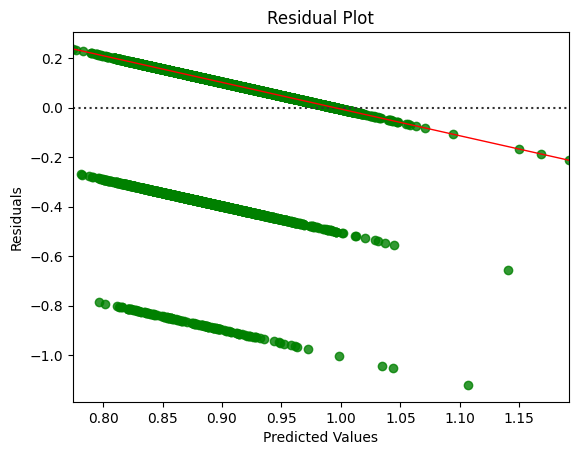

In [ ]:
# Plot residuals
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g', line_kws={'color': 'r', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


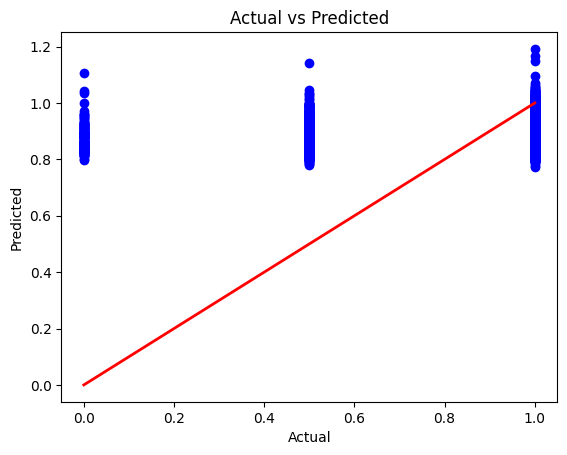

In [72]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [73]:
import joblib

# Save the  model to a file
joblib.dump(model, 'accident_severity_model.pkl')


['accident_severity_model.pkl']